# Q5

In [32]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [33]:
# Load the grayscale image using OpenCV
image = cv2.imread('Q5_image/img_improvment.png', cv2.IMREAD_GRAYSCALE)

# Make a copy of the original image to avoid modifying it
output_image = image.copy()

# Make another copy of the original image for equalization purposes
equalize_image = image.copy()

# Calculate the histogram and bins of the equalize_image using NumPy
hist, bins = np.histogram(equalize_image.flatten(), 256, [0, 256])

# Calculate the cumulative distribution function (CDF) of the histogram
cdf = hist.cumsum()

# Normalize the CDF so that the maximum value is 1
cdf = cdf / cdf[-1]

# Apply histogram equalization to the equalize_image using the CDF
equalize_image = cdf[image] * 255

# Convert the equalized image to unsigned 8-bit integer format
equalize_image = np.uint8(equalize_image)

(-0.5, 383.5, 287.5, -0.5)

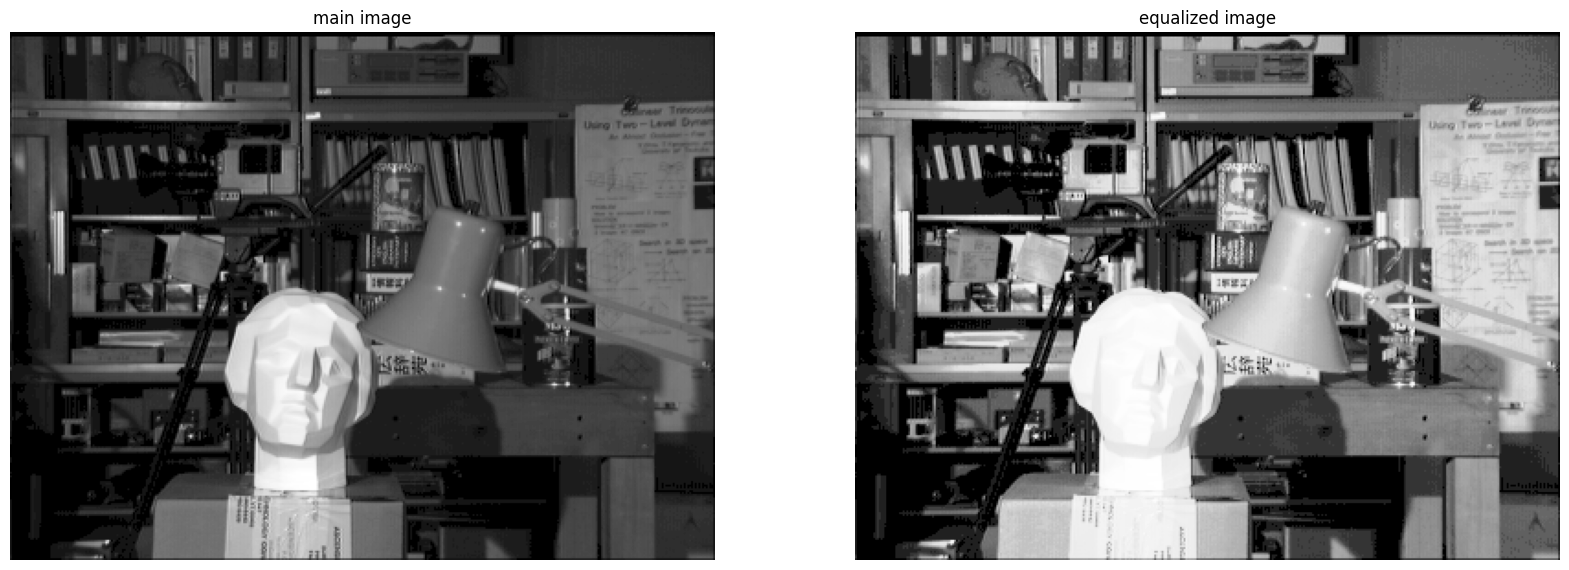

In [34]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [35]:
def ACE1(image, gridSize):
  '''
  Adaptive Contrast Enhancement using histogram equalization on non-overlapping image grids.
  Implements the first method (calculating transition function for each grid).
  '''
  
  # Make a copy of the input image to avoid modifying it
  output_image = image.copy()
  
  # Get the dimensions of the input image
  x,y = image.shape
  
  # Loop over all non-overlapping image grids with size gridSize x gridSize
  for i in range(0, x, gridSize):
    for j in range(0, y, gridSize):
      
      # Extract the current grid from the input image
      grid = image[i:i+gridSize, j:j+gridSize]
      
      # Calculate the histogram and bins of the grid using NumPy
      hist, bins = np.histogram(grid.flatten(), 256, [0, 256])
      
      # Calculate the cumulative distribution function (CDF) of the histogram
      cdf = hist.cumsum()
      
      # Normalize the CDF so that the maximum value is 1
      cdf = cdf / cdf[-1]
      
      # Apply histogram equalization to the grid using the CDF
      grid = cdf[grid] * 255
      
      # Convert the equalized grid to unsigned 8-bit integer format
      grid = np.uint8(grid)
      
      # Replace the current grid in the output image with the equalized grid
      output_image[i:i+gridSize, j:j+gridSize] = grid
    
  # Return the output image
  return output_image


(-0.5, 383.5, 287.5, -0.5)

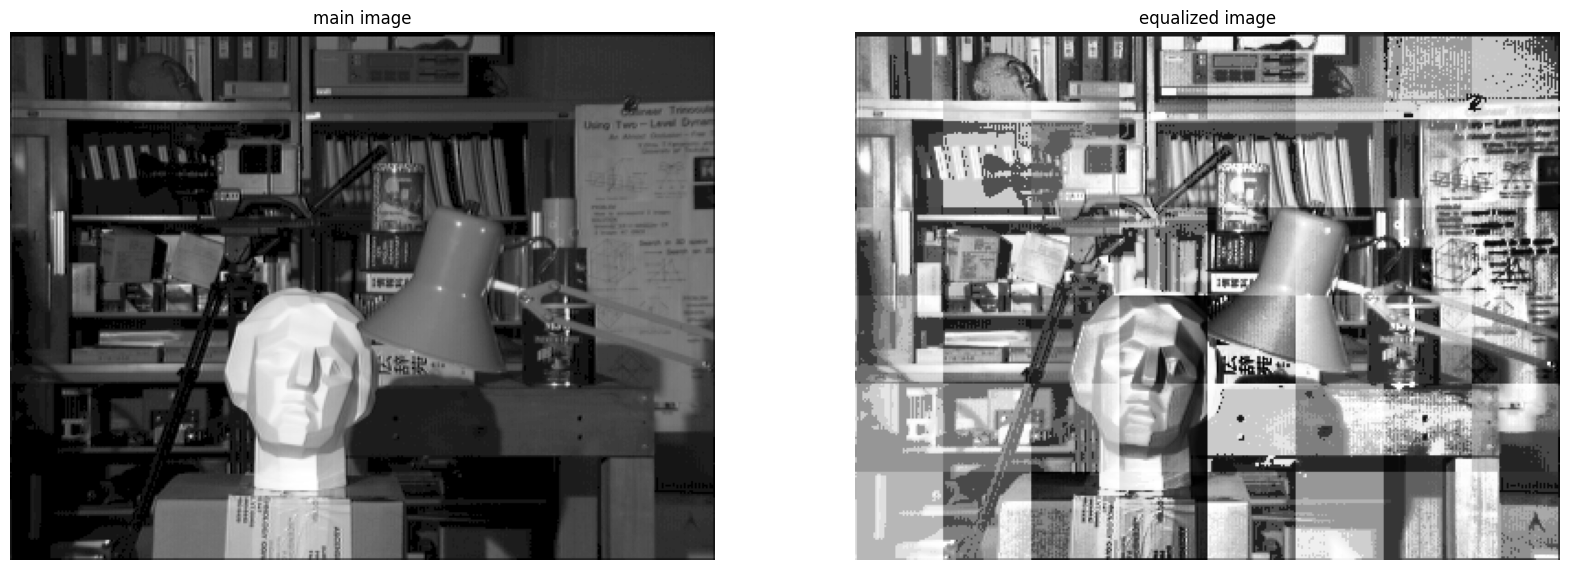

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [37]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    
    # Make a copy of the input image
    output = image.copy()
    # Define the padding size for the image
    pad = (gridSize[0]//2,gridSize[1]//2)
    # Add padding to the image using cv2.copyMakeBorder function
    image = cv2.copyMakeBorder(image,pad[0],pad[0],pad[1],pad[1],cv2.BORDER_CONSTANT,value=0)
    # Get the dimensions of the padded image
    x,y = image.shape
    # Loop over the pixels in the padded image
    for i in range(pad[0],x-pad[0]):
        for j in range(pad[1],y-pad[1]):
            # Get the grid around the current pixel
            grid = image[i-pad[0]:i+pad[0]+1,j-pad[1]:j+pad[1]+1]
            # Calculate the histogram and cumulative distribution function for the grid
            hist, bins = np.histogram(grid.flatten(),256,[0,256])
            cdf = hist.cumsum()
            cdf = cdf/cdf[-1]
            # Apply histogram equalization using numpy indexing
            grid = cdf[grid] * 255
            # Convert the equalized image to unsigned 8-bit integers
            grid = np.uint8(grid)
            # Update the output image with the equalized pixel value
            output[i-pad[0],j-pad[1]] = grid[pad[0],pad[1]]
    # Return the output image
    return output

(-0.5, 383.5, 287.5, -0.5)

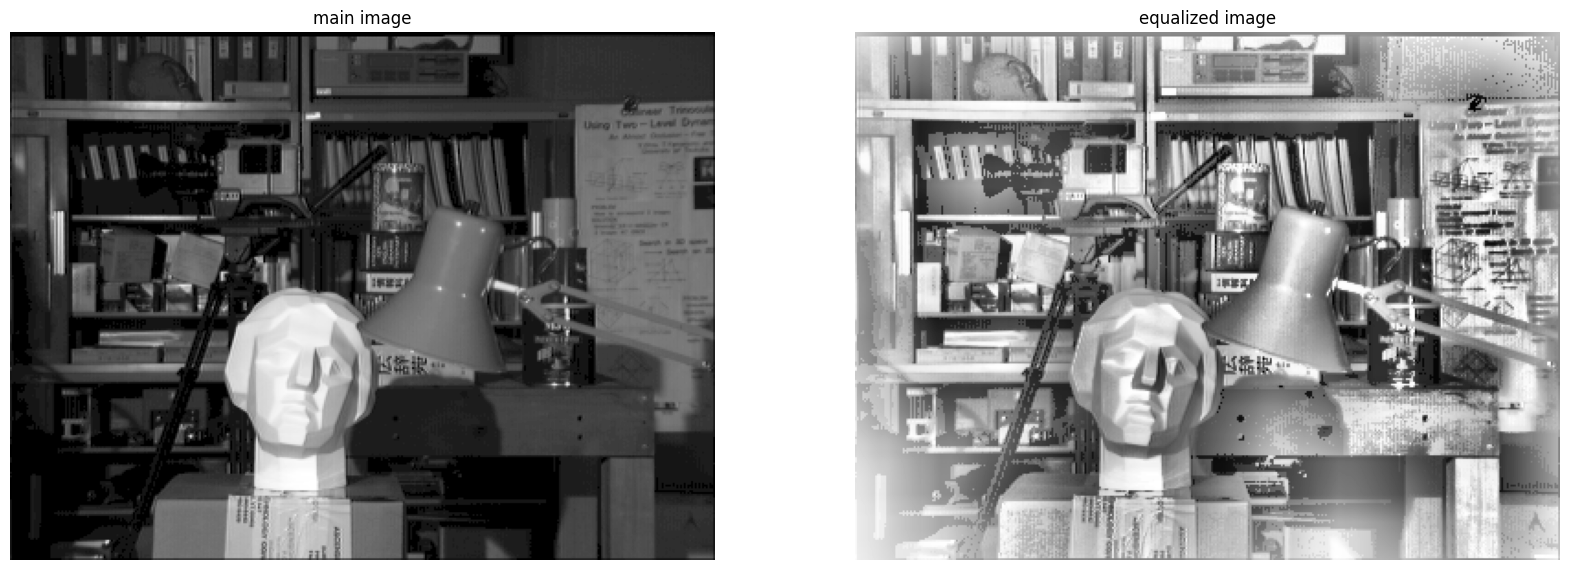

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [39]:
def CLAHE(image, gridSize, clip_limit):
    '''
    Implement Contrast Limited Adaptive Histogram Equalization (CLAHE) algorithm
    You can use OpenCV built-in tools for applying padding
    You can't use the equalize function of OpenCV
    Use second method for ACE implementation (calculating transition function for each pixel)

    Inputs:
      image (ndarray): Input image
      gridSize (tuple): Window size for calculating histogram equalization
      clip_limit (int): Threshold for contrast limiting

    Output:
      output (ndarray): Improved image
    '''
    
    # Make a copy of the input image
    output = image.copy()
    
    # Calculate the padding size
    pad = (gridSize[0] // 2, gridSize[1] // 2)
    
    # Apply padding using OpenCV's copyMakeBorder function
    image_padded = cv2.copyMakeBorder(image, pad[0], pad[0], pad[1], pad[1], cv2.BORDER_REFLECT)
    
    # Get the shape of the input image
    x, y = image.shape
    
    # Loop through each pixel of the input image
    for i in range(pad[0], x + pad[0]):
        for j in range(pad[1], y + pad[1]):
            
            # Calculate the histogram of the current window
            hist = np.histogram(image_padded[i - pad[0]:i + pad[0] + 1, j - pad[1]:j + pad[1] + 1].flatten(), 256, [0, 256])[0]
            
            # Clip the histogram to the clip_limit threshold
            hist = np.clip(hist, 0, clip_limit)
            
            # Apply the contrast limiting to the histogram
            hist = hist + clip_limit
            
            # Calculate the cumulative distribution function (CDF) of the histogram
            cdf = np.cumsum(hist)
            cdf = cdf / cdf[-1]
            
            # Apply the transition function to the current pixel and store the result in the output image
            output[i - pad[0], j - pad[1]] = cdf[image[i - pad[0], j - pad[1]]] * 255
    
    # Return the improved image
    return output

(-0.5, 383.5, 287.5, -0.5)

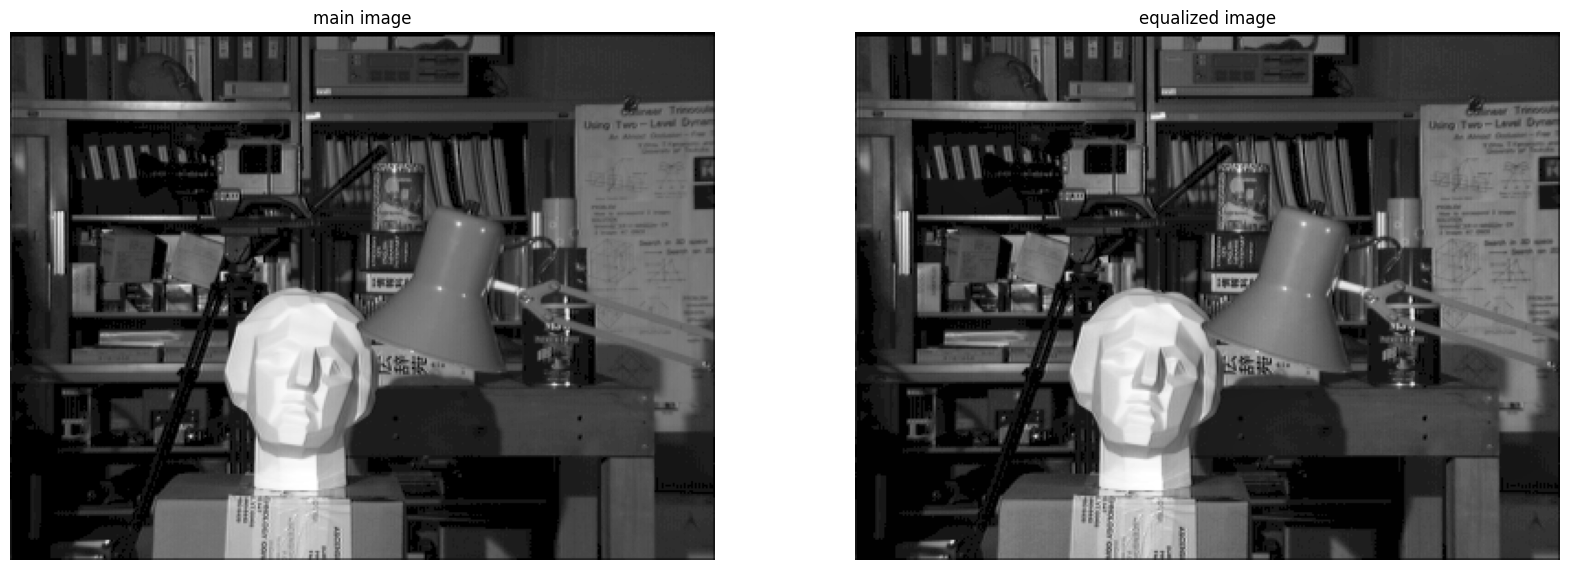

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')